# Utilities

In [ ]:
import matplotlib.pyplot as plt 
import cv2 as cv
import numpy as np 
import seaborn as sns
import os 
import random
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow 


### Connect to drive to be able to deal with it as your disk instead of your personal PC and sense we deal with colab its much better to connect it with drive and useing it as a desk(memory contain images in form of folder).

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# handeling the image manully

In [ ]:
SIZE = 224
Image_directory = '/content/drive/MyDrive/Monkeypox Skin Image Dataset/'
image_dataset = []
labels = []


In [ ]:
Normal_images = os.listdir(Image_directory + 'Normal/')
for i , image_name in enumerate(Normal_images):

  if (image_name.split('.')[1] == 'png'):
    image = cv.imread(Image_directory + 'Normal/' + image_name)
    image = Image.fromarray(image , 'RGB')
    image = image.resize((SIZE , SIZE))
    image_dataset.append(np.array(image))
    labels.append(0)

Monkeypox_images = os.listdir(Image_directory + 'Monkeypox/')
for i , image_name in enumerate(Monkeypox_images):

  if (image_name.split('.')[1] == 'png'):
    image = cv.imread(Image_directory + 'Monkeypox/' + image_name)
    image = Image.fromarray(image , 'RGB')
    image = image.resize((SIZE , SIZE))
    image_dataset.append(np.array(image))
    labels.append(1)

Chickenpox_images = os.listdir(Image_directory + 'Chickenpox/')
for i , image_name in enumerate(Chickenpox_images):

  if (image_name.split('.')[1] == 'png'):
    image = cv.imread(Image_directory + 'Chickenpox/' + image_name)
    image = Image.fromarray(image , 'RGB')
    image = image.resize((SIZE , SIZE))
    image_dataset.append(np.array(image))
    labels.append(2)

image_dataset = np.array(image_dataset)
labels = np.array(labels)

In [ ]:
print(image_dataset.shape)
print(labels.shape)


(679, 224, 224, 3)
(679,)


In [ ]:
print("Dataset with total {} images , ({} , {}) resolution and {} channels".format(image_dataset.shape[0] , image_dataset.shape[1] , image_dataset.shape[2] , image_dataset.shape[3]))

Dataset with total 679 images , (224 , 224) resolution and 3 channels


In [ ]:
# type(image_dataset)
# type(labels)
print(image_dataset.shape)
print(labels.shape)

(679, 224, 224, 3)
(679,)


## this line of code simply visualizes a random image with the attached label.

Label for this image is:  2


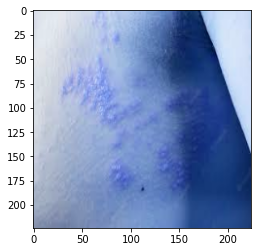

In [ ]:
image_number = random.randint(0, len(image_dataset)-1)
plt.imshow(np.reshape(image_dataset[image_number], (224, 224, 3)))
print("Label for this image is: ", labels[image_number])

# with exist data imbalaning in our data image

In [ ]:
print("Length of Normal, Monkeypox, and chickenpox classes respectively are {} , {} , {}".format(len(Normal_images) , len(Chickenpox_images) , len(Monkeypox_images )))


Length of Normal, Monkeypox, and chickenpox classes respectively are 293 , 107 , 279


# A second way to handle images from dirctory or file. "Functional way"

In [ ]:
normal_image_path = '/content/drive/MyDrive/Monkeypox Skin Image Dataset/Normal'
monkeypox_image_path = '/content/drive/MyDrive/Monkeypox Skin Image Dataset/Monkeypox'
chickenpox_image_path = '/content/drive/MyDrive/Monkeypox Skin Image Dataset/Chickenpox'

In [ ]:
def LoadImages(path):
  ImagesList = os.listdir(path)
  loaded_Images = []
  for image in ImagesList:
    img = cv.imread(path + image)
    loaded_Images.append(img)
  return loaded_Images

In [ ]:
Normal_images = LoadImages(normal_image_path+'/')
Monkeypox_images = LoadImages(monkeypox_image_path+'/')
Chickenpox_images = LoadImages(chickenpox_image_path+'/')

# Visualization 
### remember classes 0:'normal' , 1:'monkeypox' , 2:'chickenpox'

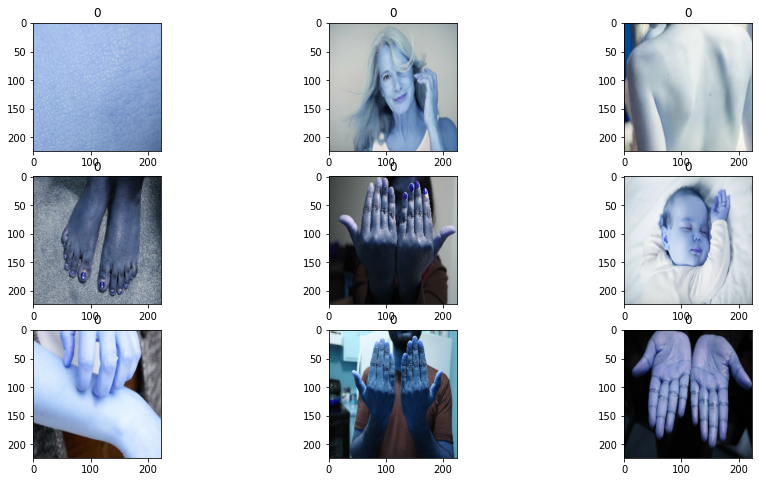

In [ ]:
plt.figure(figsize =(15 , 8))
for i in np.arange(9):
  plt.subplot(3 , 3 , i+1)
  plt.imshow(Normal_images[i])
  plt.title(0)

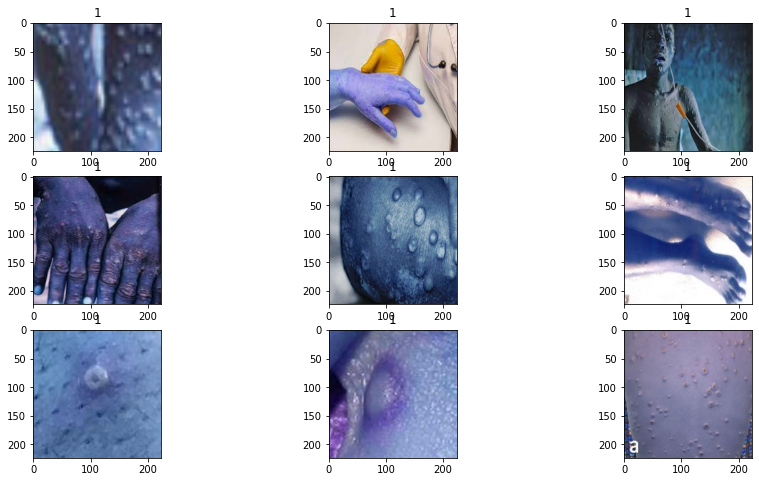

In [ ]:
plt.figure(figsize =(15 , 8))
for i in np.arange(9):
  plt.subplot(3 , 3 , i+1)
  plt.imshow(Monkeypox_images[i])
  plt.title(1)

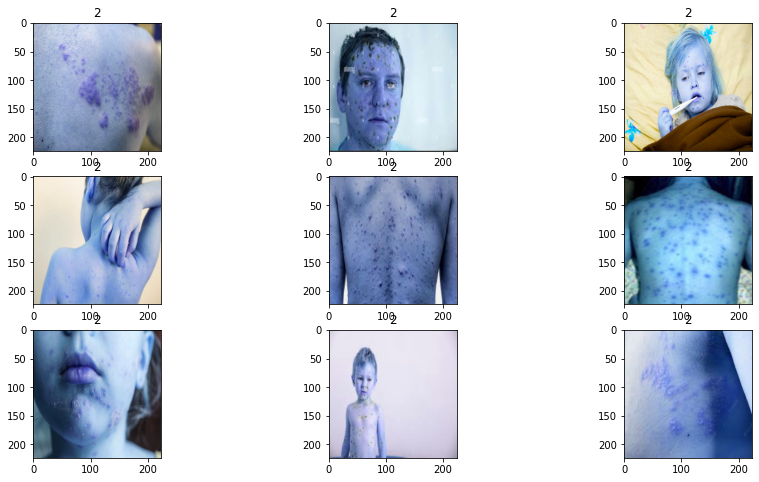

In [ ]:
plt.figure(figsize =(15 , 8))
for i in np.arange(9):
  plt.subplot(3 , 3 , i+1)
  plt.imshow(Chickenpox_images[i])
  plt.title(2)

# Drawback like balance data is necessary to handle it to make sure that a model does not seem biased to a specific class. 

In [ ]:
balanced_dataset_Images = []
balanced_len_labels = []                 
for i in np.arange(len(Chickenpox_images[:108])):
  balanced_dataset_Images.append(Normal_images[i])
  balanced_dataset_Images.append(Monkeypox_images[i])
  balanced_dataset_Images.append(Chickenpox_images[i])
  balanced_len_labels.append(0)  
  balanced_len_labels.append(1)  
  balanced_len_labels.append(2)

In [ ]:
len(balanced_dataset_Images)

321

In [ ]:
balanced_dataset_Images = np.array(balanced_dataset_Images)
balanced_len_labels = np.array(balanced_len_labels)

In [ ]:
print(balanced_dataset_Images.shape)
print(balanced_len_labels.shape)

(321, 224, 224, 3)
(321,)


# After data balance

In [ ]:
def len_func(image):
  len_dataset = len(image)
  image_for_each_class = int(len_dataset/3)
  return image_for_each_class

In [ ]:
normal = len_func(balanced_dataset_Images)
monkeypox = len_func(balanced_dataset_Images)
chickenpox = len_func(balanced_dataset_Images)


In [ ]:
print("Length of Normal, Monkeypox, and chickenpox classes respectively are {}".format(normal),(chickenpox),(monkeypox))

Length of Normal, Monkeypox, and chickenpox classes respectively are 107 107 107


# Data augmentation just for visualize how our data really augmented
## there are diferent types of data augmentation(**geometric operation**):
#### 1- **horizantal shift/right** , up/down ['translated image'] --->(part of pixel intensity disappearing)
#### 2- **flipping image**
#### 3- **rotating image**
#### 4- **Zooming/ in , out** the image at random areas of the image
## Position augmentation:
###  like , Hue , Saturation , Contrast , Brightness. (we did not use them).

Text(0.5, 1.0, 'Translated_Images')

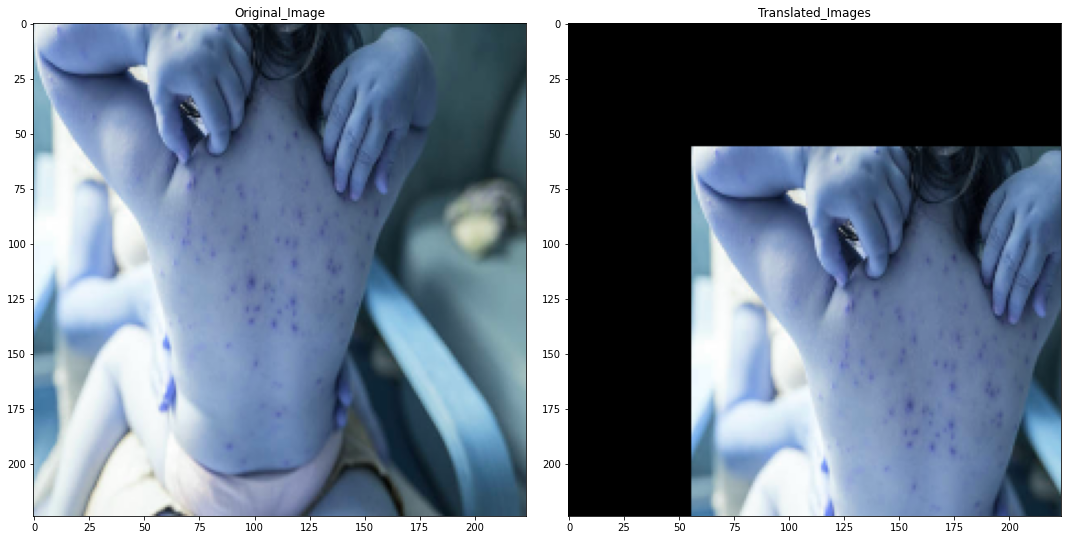

In [ ]:
def translation(image):
  height , width = image.shape[:2]
  quarter_height , quarter_width = height/4 , width/4
  translation_matrix = np.float32([[1 , 0 , quarter_height] , [0 , 1 , quarter_width]])
  translate_image = cv.warpAffine(image , translation_matrix  , (width,height))
  return translate_image

image = balanced_dataset_Images[np.random.randint(0,321)]
original_image = image
translated_image = translation(original_image)


fig , axs = plt.subplots(1, 2 , figsize=(15,8))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title("Original_Image")

axs[1].imshow(translated_image)
axs[1].set_title('Translated_Images')

Text(0.5, 1.0, 'Rotated_Image')

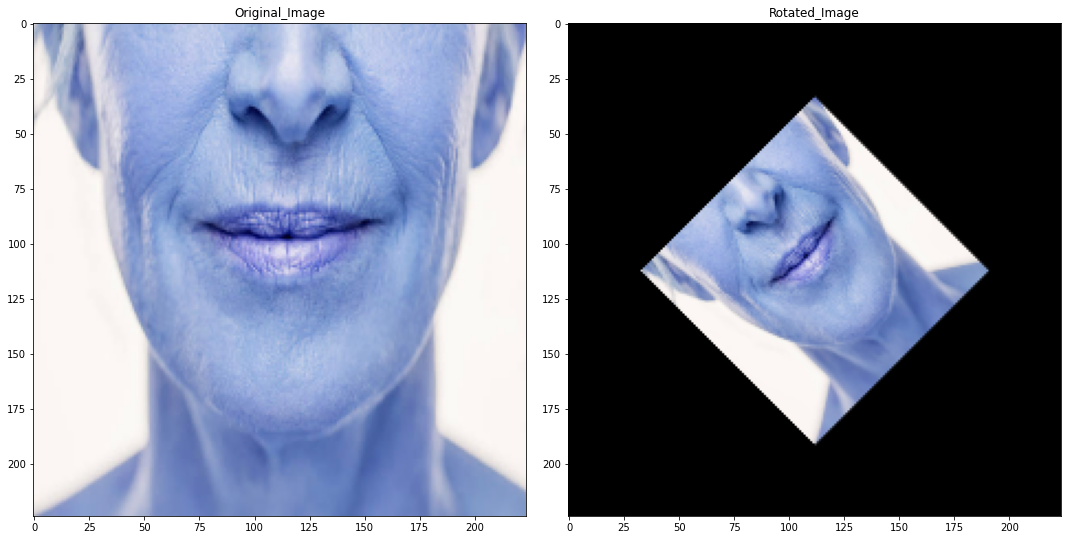

In [ ]:
# rotate image
def rotation(image):
  # center ---> (height/2 , width/2)
  height , width = image.shape[:2]
  rotate_matrix = cv.getRotationMatrix2D((height/2 , width/2) , 45 , .5)
  rotate_genrator= cv.warpAffine(image , rotate_matrix , (width , height))
  return rotate_genrator


image = balanced_dataset_Images[np.random.randint(0 , 321)]
original_image = image
rotated_image = rotation(original_image)

fig , axs = plt.subplots(1 , 2, figsize = (15 , 8))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title("Original_Image")

axs[1].imshow(rotated_image)
axs[1].set_title("Rotated_Image")


Text(0.5, 1.0, 'Flipped_Image')

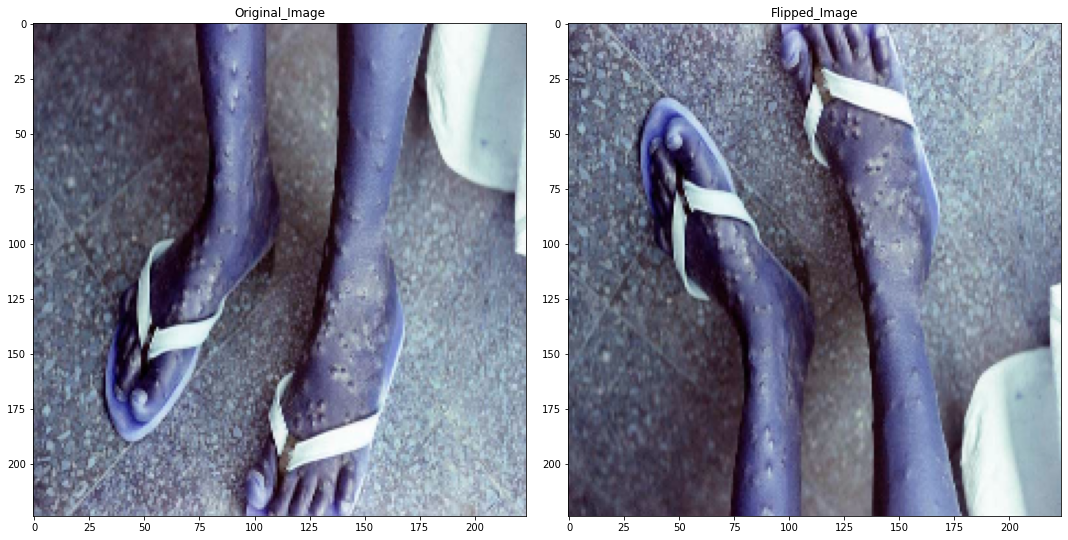

In [ ]:
# image flipping
# 1 -- > vertical flip , 0 ---> horizantal flip
def flipped(image):
  flipped_image = cv.flip(image , 0)
  return flipped_image

image = balanced_dataset_Images[np.random.randint(0,321)]
original_image = image
flipped_Image = flipped(original_image)
# (1 ----> nrow) , (2 ----> ncol ----> 2 axs 0 and 1)
fig , axs = plt.subplots(1 , 2 , figsize = (15 , 8))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title("Original_Image")

axs[1].imshow(flipped_Image)
axs[1].set_title("Flipped_Image")

# if there is a chance to use this augmentation technique in a way like this manually we need to cascade the augmentation operation.

In [ ]:
# cascade the augmentation operations
def augmentation(image , label):
  if np.random.rand()<0.5:
    image=rotation(image)
  if np.random.rand()<0.5:
    image=translation(image)
  if np.random.rand()<0.5:
    image=flipped(image)
    
  return image,label

# After applying the cascade operation to control and monitor the augmentation operation.

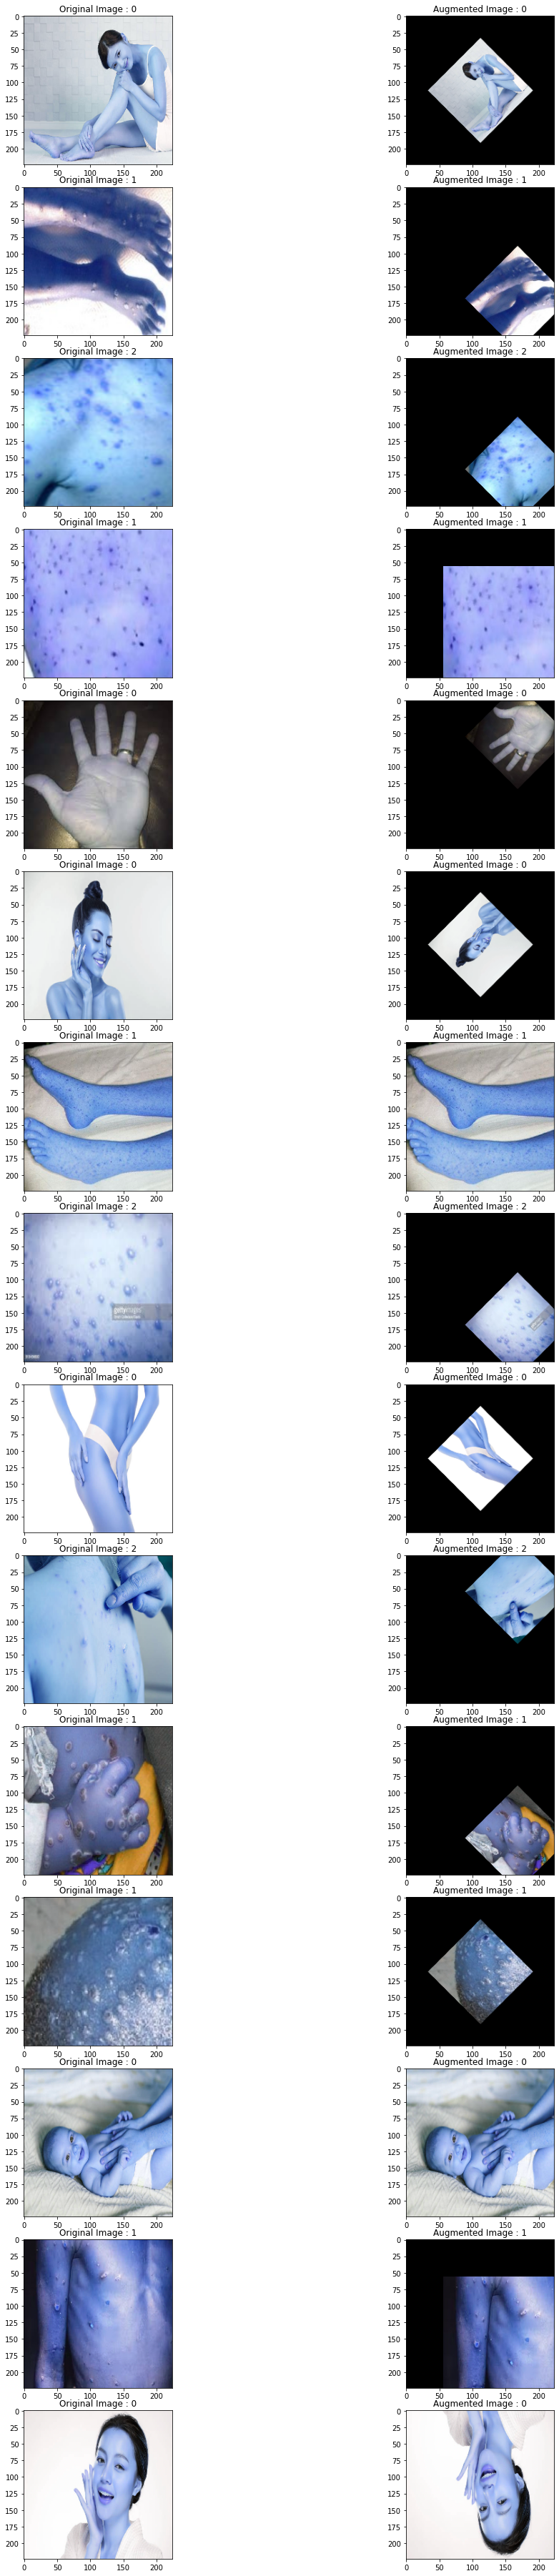

In [ ]:
#visualize the agumented images 
ncol = 2
nrow = 15

fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()

for i in range(15):
  randnum = np.random.randint(0, len(balanced_dataset_Images) - 1)
  random_image = balanced_dataset_Images[randnum]
    
  original_image =random_image
  augmented_image, label = augmentation(random_image,balanced_len_labels[randnum])
    
  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image : "+ str(label))
  
  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image : " +str(label))

In [ ]:
# here we make sure that shape of images are the same -----> images must be on the same shape.
print(balanced_dataset_Images[0].shape ,balanced_dataset_Images[1].shape)

(224, 224, 3) (224, 224, 3)
